# Principal Component Analysis

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

dataset=pd.read_csv('source/xvsy.csv').values

print(dataset)

[[25.   6. ]
 [30.   6. ]
 [40.  10. ]
 [50.   9. ]
 [15.   6. ]
 [20.   7. ]
 [35.   8. ]
 [45.   7. ]
 [35.   6.5]
 [27.   7.5]
 [ 5.   4. ]
 [20.   4.5]
 [ 8.   5.5]
 [12.   3.5]
 [45.   9. ]
 [15.   3. ]]


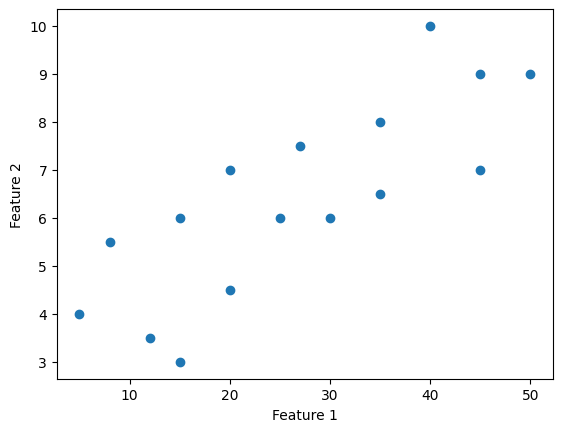

In [6]:
from matplotlib import pyplot as plt

plt.scatter(dataset[:,0],dataset[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
from sklearn.decomposition import PCA

model = PCA(n_components=1)

model.fit(dataset)

print(model.components_)

[[0.99307469 0.11748473]]


In [8]:
0.99307469/(0.99307469 +0.11748473)

0.8942112165416598

In [9]:
0.11748473/(0.99307469 +0.11748473)

0.10578878345834031

In [10]:
dataset_new=model.transform(dataset)

In [12]:
dataset_new

array([[ -1.72354171],
       [  3.24183174],
       [ 13.64251755],
       [ 23.45577971],
       [-11.6542886 ],
       [ -6.57143043],
       [  8.44217464],
       [ 18.2554368 ],
       [  8.26594755],
       [  0.43883476],
       [-21.82000495],
       [ -6.86514225],
       [-18.66455379],
       [-14.92722449],
       [ 18.49040626],
       [-12.00674279]])

## Iris flower example

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


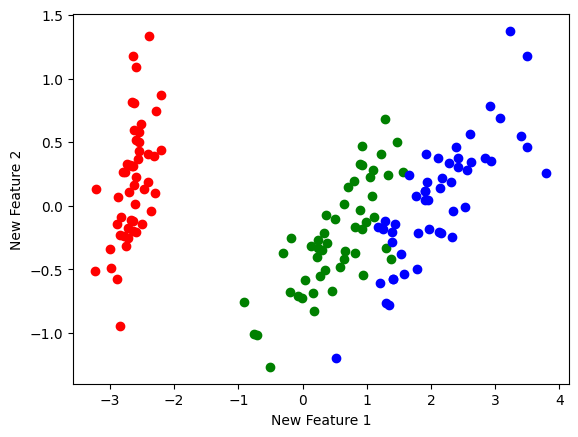

In [28]:
from sklearn.decomposition import PCA

iris_dataset= pd.read_csv('source/iris.csv').values

data=iris_dataset[:,0:4]
target=iris_dataset[:,4]

model = PCA(n_components=2)

model.fit(data)
data_new=model.transform(data)

print(data_new[:5])

for i in range(len(target)):
    
    if(target[i]==0):
        
        plt.scatter(data_new[i][0],data_new[i][1],c='r')
    if(target[i]==1):
         plt.scatter(data_new[i][0],data_new[i][1],c='g')
    if(target[i]==2):
         plt.scatter(data_new[i][0],data_new[i][1],c='b')

plt.xlabel('New Feature 1')
plt.ylabel('New Feature 2')
plt.show()

## Before PCA

In [47]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()

from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

model.fit(train_data,train_target) 
predicted_target=model.predict(test_data)

from sklearn.metrics import accuracy_score

print('train_data',train_data.shape)
acc=accuracy_score(test_target,predicted_target)
print('acc:',acc)

train_data (120, 4)
acc: 0.9333333333333333


## After PCA

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()

from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data_new,target,test_size=0.2)
model.fit(train_data,train_target) 
predicted_target=model.predict(test_data)

from sklearn.metrics import accuracy_score

print('train_data',train_data.shape)
acc=accuracy_score(test_target,predicted_target)
print('acc:',acc)

train_data (120, 2)
acc: 0.9666666666666667


# How the Dimeansionality Reduction is done

In [63]:
dataset=pd.read_csv('source/xvsy.csv').values

print(dataset)
model = PCA(n_components=1)

model.fit(dataset)
data_new=model.transform(dataset)


print(dataset)
print(model.components_)

[[25.   6. ]
 [30.   6. ]
 [40.  10. ]
 [50.   9. ]
 [15.   6. ]
 [20.   7. ]
 [35.   8. ]
 [45.   7. ]
 [35.   6.5]
 [27.   7.5]
 [ 5.   4. ]
 [20.   4.5]
 [ 8.   5.5]
 [12.   3.5]
 [45.   9. ]
 [15.   3. ]]
[[25.   6. ]
 [30.   6. ]
 [40.  10. ]
 [50.   9. ]
 [15.   6. ]
 [20.   7. ]
 [35.   8. ]
 [45.   7. ]
 [35.   6.5]
 [27.   7.5]
 [ 5.   4. ]
 [20.   4.5]
 [ 8.   5.5]
 [12.   3.5]
 [45.   9. ]
 [15.   3. ]]
[[0.99307469 0.11748473]]


In [64]:
dataset_new_m=np.matmul(dataset,model.components_.T)
print(dataset_new_m)

[[25.53177561]
 [30.49714905]
 [40.89783486]
 [50.71109703]
 [15.60102872]
 [20.68388689]
 [35.69749196]
 [45.51075412]
 [35.52126486]
 [27.69415208]
 [ 5.43531236]
 [20.39017507]
 [ 8.59076353]
 [12.32809282]
 [45.74572358]
 [15.24857453]]


In [65]:
# Dimension reduction dataset

dataset_new_m-np.mean(dataset_new_m)

array([[ -1.72354171],
       [  3.24183174],
       [ 13.64251755],
       [ 23.45577971],
       [-11.6542886 ],
       [ -6.57143043],
       [  8.44217464],
       [ 18.2554368 ],
       [  8.26594755],
       [  0.43883476],
       [-21.82000495],
       [ -6.86514225],
       [-18.66455379],
       [-14.92722449],
       [ 18.49040626],
       [-12.00674279]])

# PCA for visualization: Hand-written digits

In [66]:
from sklearn.datasets import load_digits

dataset = load_digits()
images=dataset.images

print(images.shape)

(1797, 8, 8)


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)
2


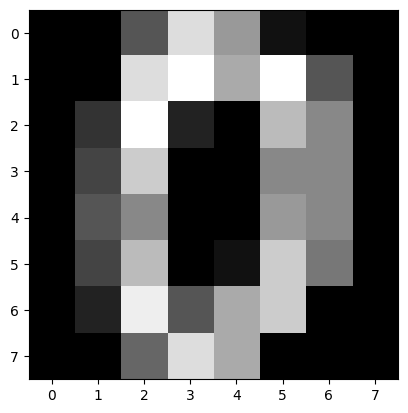

In [70]:
from matplotlib import pyplot as plt

plt.imshow(images[0],cmap='gray')
print(images[0])
print(images[0].shape)
print(images[0].ndim)

In [71]:
print(images.ndim)

3


In [115]:
data=dataset.data
target=dataset.target
print(data.shape)

(1797, 64)


In [95]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [97]:
len(data[0])

64

In [112]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
new_data = pca.fit_transform(data)
print(data[0].shape)
# print(data.shape)
# print(new_data.shape)
# print(data[1])
print('---')
# print(new_data[1])
# print('---')
# print(pca.components_)

print(pca.components_.ndim)
print(pca.components_)
print(pca.components_.shape)
print(len(pca.components_[0]))

(64,)
---
2
[[ 2.89606574e-17 -1.73094654e-02 -2.23428836e-01 -1.35913293e-01
  -3.30322966e-02 -9.66340952e-02 -8.32944685e-03  2.26900033e-03
  -3.20516442e-04 -1.19308903e-01 -2.44451678e-01  1.48512753e-01
  -4.67319289e-02 -2.17740742e-01 -1.48136819e-02  4.47779573e-03
  -4.94135986e-05 -7.95419366e-02  8.33951305e-02  2.15915340e-01
  -1.72126812e-01 -1.63712091e-01  2.86444532e-02  4.23251896e-03
   9.85488751e-05  6.42319144e-02  2.54093311e-01 -3.56770966e-02
  -2.09462587e-01 -4.31311369e-02  5.13118831e-02  2.13422768e-04
  -0.00000000e+00  1.59950880e-01  3.68690785e-01  1.64406849e-01
   8.52007853e-02  3.72982740e-02  2.15867023e-02 -0.00000000e+00
   1.28865572e-03  1.06945275e-01  3.03067443e-01  2.47813031e-01
   2.09637294e-01  1.22325113e-02 -3.69458478e-02  1.61485053e-03
   6.93023467e-04 -8.35144771e-03 -5.58599144e-02  9.30534146e-02
   1.07387731e-01 -1.37734558e-01 -6.32879462e-02  9.61672188e-04
   9.55077967e-06 -1.40786850e-02 -2.35675491e-01 -1.41225574e-0

In [113]:
new_data

array([[ -1.25946591,  21.2748822 ],
       [  7.95761364, -20.76870074],
       [  6.99192121,  -9.95598387],
       ...,
       [ 10.80128205,  -6.960252  ],
       [ -4.87209604,  12.42395465],
       [ -0.34439286,   6.3655508 ]])

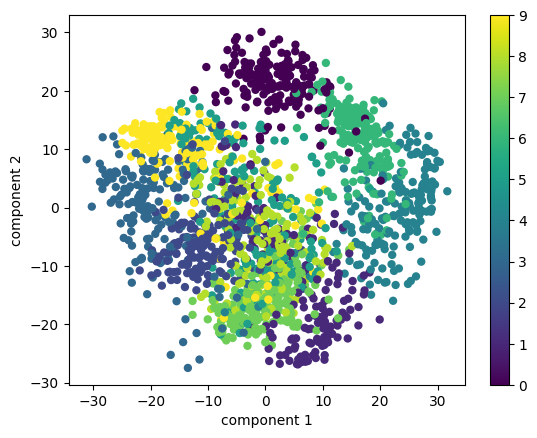

In [123]:
plt.scatter(new_data[:, 0], new_data[:, 1],
            c=target, edgecolor='none')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

# Choosing the number of components

Text(0, 0.5, 'cumulative explained variance')

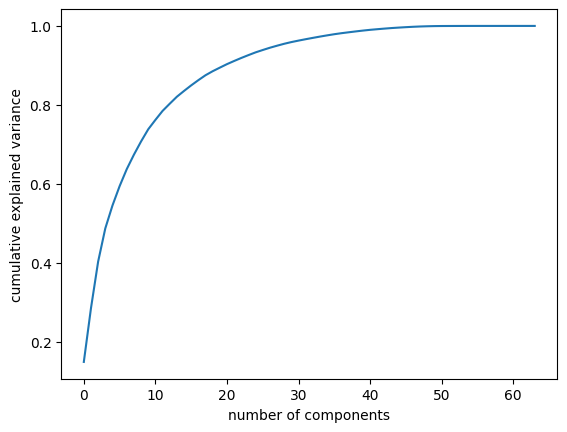

In [135]:
pca = PCA()
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')